In [160]:
#missing values
#categorical feature Encoding
#outlier 
#imbalance
#scaling

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   
from sklearn.metrics import mean_squared_error
import warnings
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [162]:
df = pd.read_csv('./insurance.csv')
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [164]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [165]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


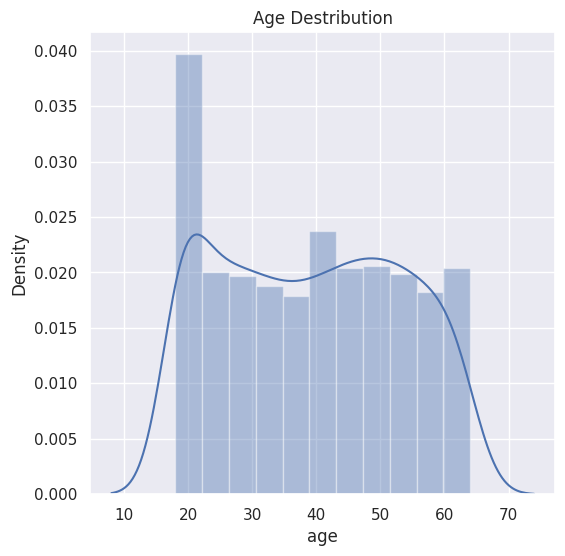

In [166]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Destribution')
plt.show()

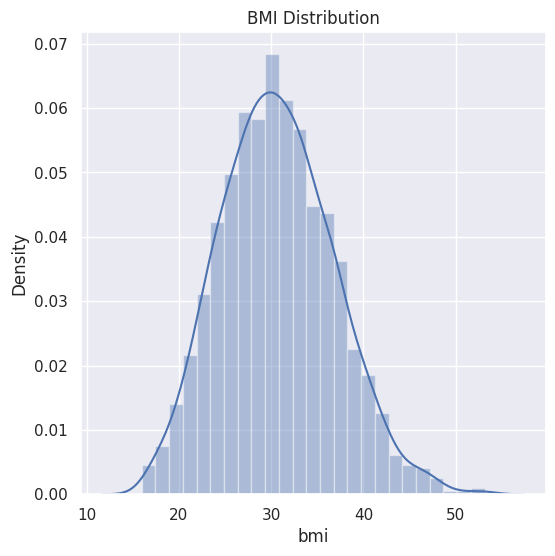

In [167]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

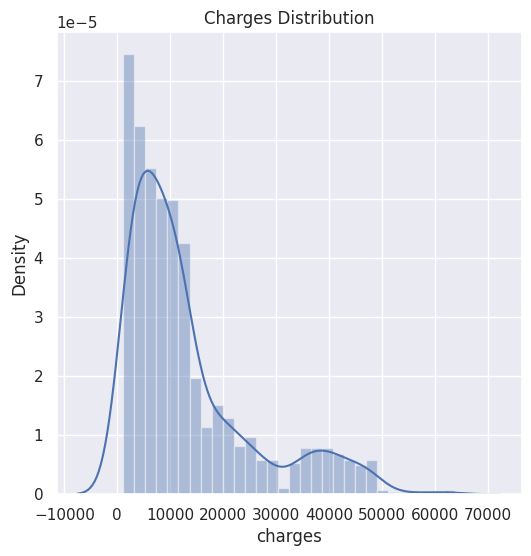

In [168]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [169]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

region_mapping = {
    'southwest': 1,
    'northwest': 2,
    'northeast': 3,
    'southeast': 4
}
df['region'] = df['region'].map(region_mapping)

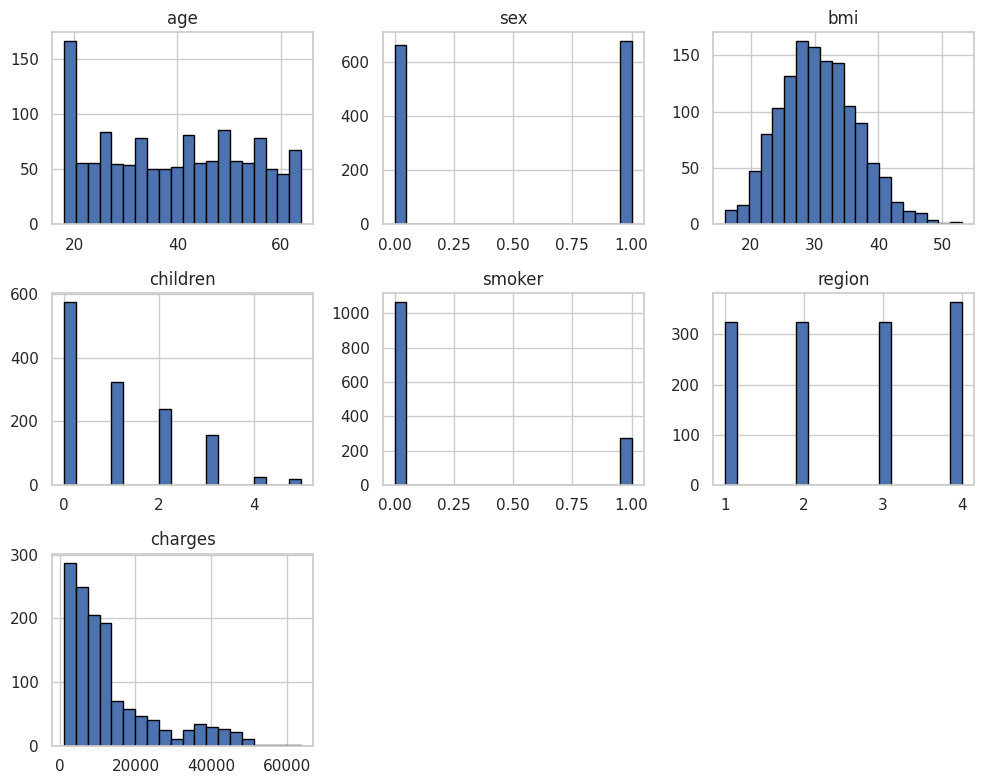

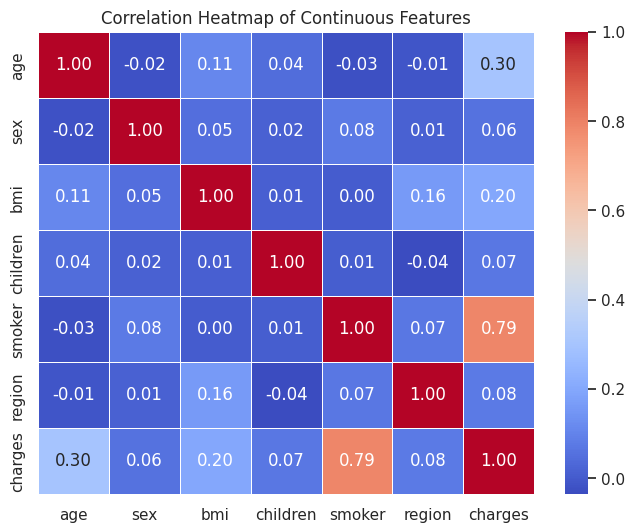

In [170]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot histograms for continuous features
df.hist(figsize=(10,8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Plot correlation heatmap for continuous features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Features")
plt.show()


In [171]:
# Function to detect outliers using IQR
def iqr(df, numeric_cols):
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    df[numeric_cols] = np.where(df[numeric_cols] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df[numeric_cols])
    df[numeric_cols] = np.where(df[numeric_cols] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df[numeric_cols])
    return df
# Function to cap outliers
#def cap_outliers(df, column):
#    lower_bound, upper_bound = detect_outliers_iqr(df, column)
#    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
#    return df

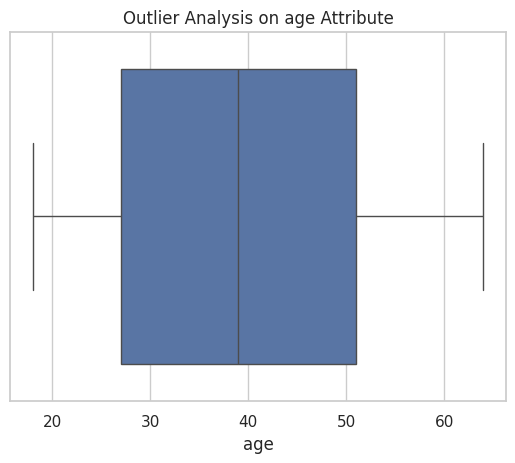

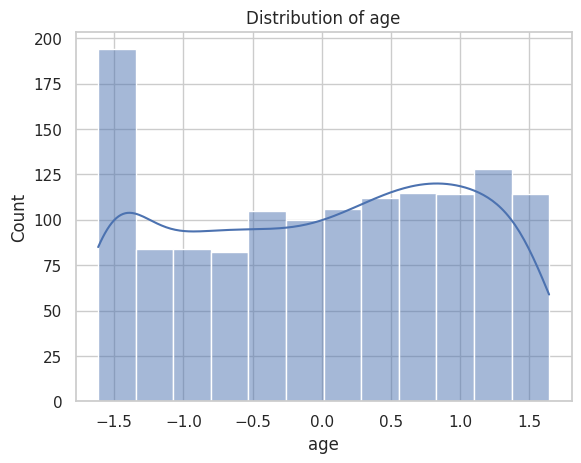

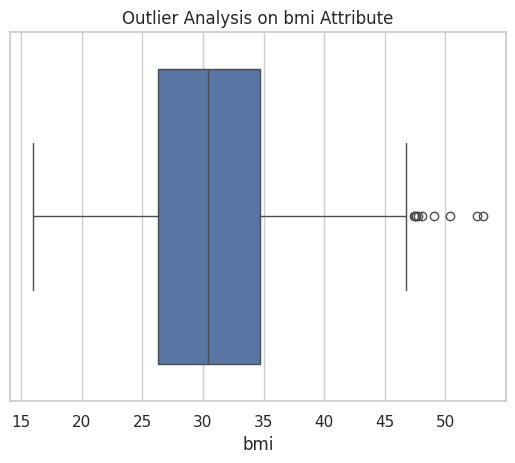

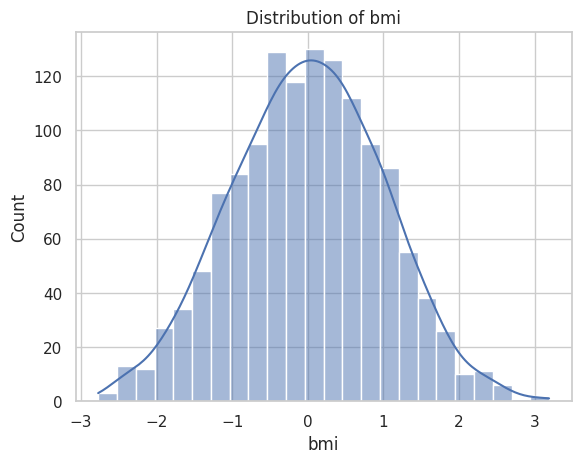

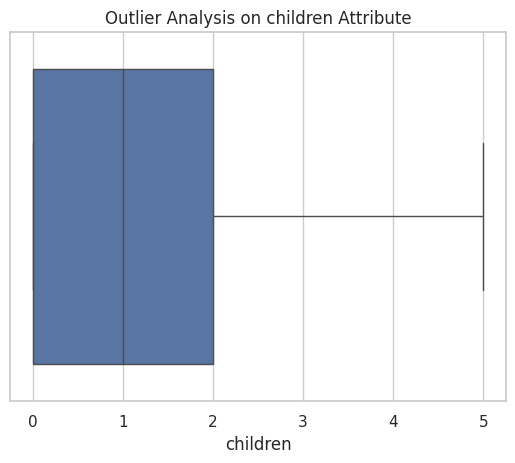

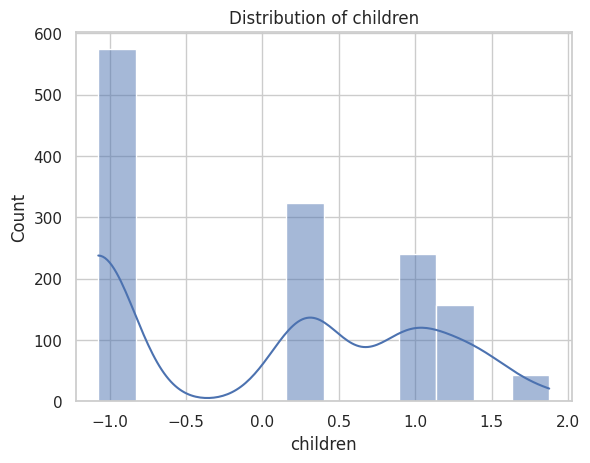

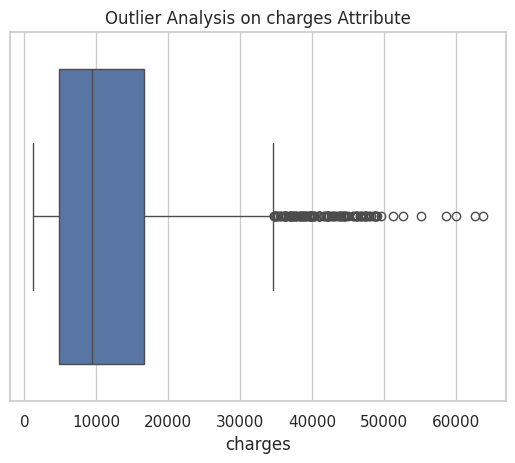

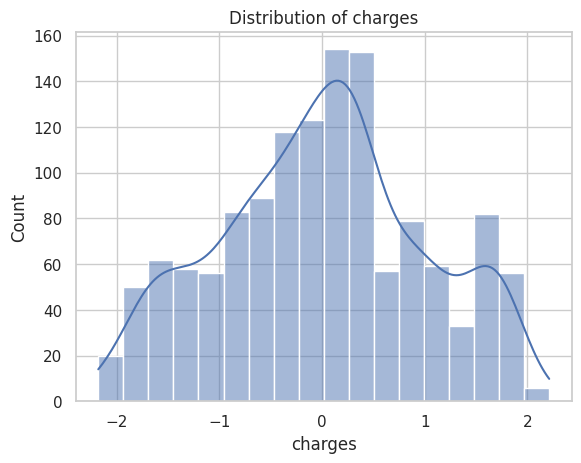

In [172]:
continuous_features = ['age', 'bmi', 'children', 'charges']
for i in continuous_features:
    sns.boxplot(data=df, x=i)
    plt.title(f'Outlier Analysis on {i} Attribute')
    plt.show()
    pt = PowerTransformer()
    df[i] = pt.fit_transform(df[[i]])

    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

In [173]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.524529,0,-0.409919,-1.074893,1,1,0.681663
1,-1.616539,1,0.548954,0.300468,0,4,-1.748842
2,-0.762870,1,0.428603,1.367452,0,4,-0.768811
3,-0.379118,1,-1.353878,-1.074893,0,2,0.978834
4,-0.454058,1,-0.242750,-1.074893,0,2,-0.916592
...,...,...,...,...,...,...,...
1333,0.789055,1,0.103843,1.367452,0,2,0.165749
1334,-1.616539,0,0.257211,-1.074893,0,3,-1.498613
1335,-1.616539,0,1.016092,-1.074893,0,4,-1.806594
1336,-1.345582,0,-0.779098,-1.074893,0,1,-1.594756


In [174]:
# Separate features and target variable
X = df.drop(['charges'], axis=1)
y = df['charges']

In [175]:
X

,age,sex,bmi,children,smoker,region
0,-1.524529,0,-0.409919,-1.074893,1,1
1,-1.616539,1,0.548954,0.300468,0,4
2,-0.762870,1,0.428603,1.367452,0,4
3,-0.379118,1,-1.353878,-1.074893,0,2
4,-0.454058,1,-0.242750,-1.074893,0,2
...,...,...,...,...,...,...
1333,0.789055,1,0.103843,1.367452,0,2
1334,-1.616539,0,0.257211,-1.074893,0,3
1335,-1.616539,0,1.016092,-1.074893,0,4
1336,-1.345582,0,-0.779098,-1.074893,0,1


In [176]:
continuous_features = ['age','bmi','children']

scaler = StandardScaler()

# Apply the transformations to the dataset
X_transformed = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Display the transformed dataset shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

# Modeling

In [177]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

In [178]:
# Custom PyTorch Model for Regression
class CustomNN(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons_per_layer, activation_fn, output_size=1):
        super(CustomNN, self).__init__()
        layers = []
        in_features = input_size
        
        # Create hidden layers
        for _ in range(hidden_layers):
            layers.append(nn.Linear(in_features, neurons_per_layer))
            layers.append(activation_fn)
            in_features = neurons_per_layer
        
        # Output layer (for regression, typically one value)
        layers.append(nn.Linear(neurons_per_layer, output_size))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

In [179]:
# Scikit-learn Wrapper for PyTorch Regression Model
class NeuralNetRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, hidden_layers=1, neurons_per_layer=32, activation_fn=nn.ReLU(), 
                 learning_rate=0.001, weight_decay=0, num_epochs=10, batch_size=32):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation_fn = activation_fn
        self.learning_rate = learning_rate
        self.weight_decay = weight_decay
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = None
        self.optimizer = None
        self.criterion = nn.MSELoss()  # Regression uses MSELoss
    
    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(self.device)  # Ensure float and correct shape

        self.model = CustomNN(self.input_size, self.hidden_layers, self.neurons_per_layer,
                              self.activation_fn, output_size=1).to(self.device)
        
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)

        for epoch in range(self.num_epochs):
            self.model.train()
            self.optimizer.zero_grad()
            output = self.model(X_tensor)
            loss = self.criterion(output, y_tensor)
            loss.backward()
            self.optimizer.step()
    
    def predict(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        output = self.model(X_tensor)
        return output.cpu().detach().numpy()
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)  # Evaluate with MSE

In [180]:
# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'hidden_layers': [1, 2, 3, 4, 5, 6 , 7 , 8 , 9 , 10],
    'neurons_per_layer': [16, 32, 64, 128, 256],
    'activation_fn': [nn.LeakyReLU()],
    'learning_rate': [0.001, 0.01, 0.1],
    'weight_decay': [1e-5, 1e-4, 1e-3],
    'num_epochs': [100],
    'batch_size': [128]
}

In [181]:
# RandomizedSearchCV for Regression
nn_regressor = NeuralNetRegressor(input_size=X_train_tensor.shape[1])
random_search = GridSearchCV(nn_regressor, param_distributions, cv=3, scoring='neg_mean_squared_error', verbose=1) #n_iter=10


In [182]:
# Fit the model and search for the best hyperparameters
random_search.fit(X_train_tensor, y_train_tensor)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


GridSearchCV(cv=3, estimator=NeuralNetRegressor(input_size=6),
             param_grid={'activation_fn': [LeakyReLU(negative_slope=0.01)],
                         'batch_size': [128],
                         'hidden_layers': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'neurons_per_layer': [16, 32, 64, 128, 256],
                         'num_epochs': [100],
                         'weight_decay': [1e-05, 0.0001, 0.001]},
             scoring='neg_mean_squared_error', verbose=1)

In [183]:
# Best model evaluation
best_model = random_search.best_estimator_
train_mse = best_model.score(X_train_tensor, y_train_tensor)
test_mse = best_model.score(X_test_tensor, y_test_tensor)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Best Parameters: {'activation_fn': LeakyReLU(negative_slope=0.01), 'batch_size': 128, 'hidden_layers': 1, 'learning_rate': 0.01, 'neurons_per_layer': 64, 'num_epochs': 100, 'weight_decay': 0.0001}
Train MSE: 0.15100999176502228
Test MSE: 0.1459646373987198


In [184]:
# Plot train/test MSE for different hyperparameters
results = random_search.cv_results_
# Get train and test MSE for each hyperparameter combination
train_scores = []
test_scores = []

for i, params in enumerate(random_search.cv_results_['params']):
    # Set the model with the ith hyperparameters
    nn_regressor.set_params(**params)
    nn_regressor.fit(X_train_tensor, y_train_tensor)
    
    # Evaluate the model on train and test sets
    train_mse = mean_squared_error(y_train_tensor, nn_regressor.predict(X_train_tensor))
    test_mse = mean_squared_error(y_test_tensor, nn_regressor.predict(X_test_tensor))
    
    train_scores.append(train_mse)
    test_scores.append(test_mse)

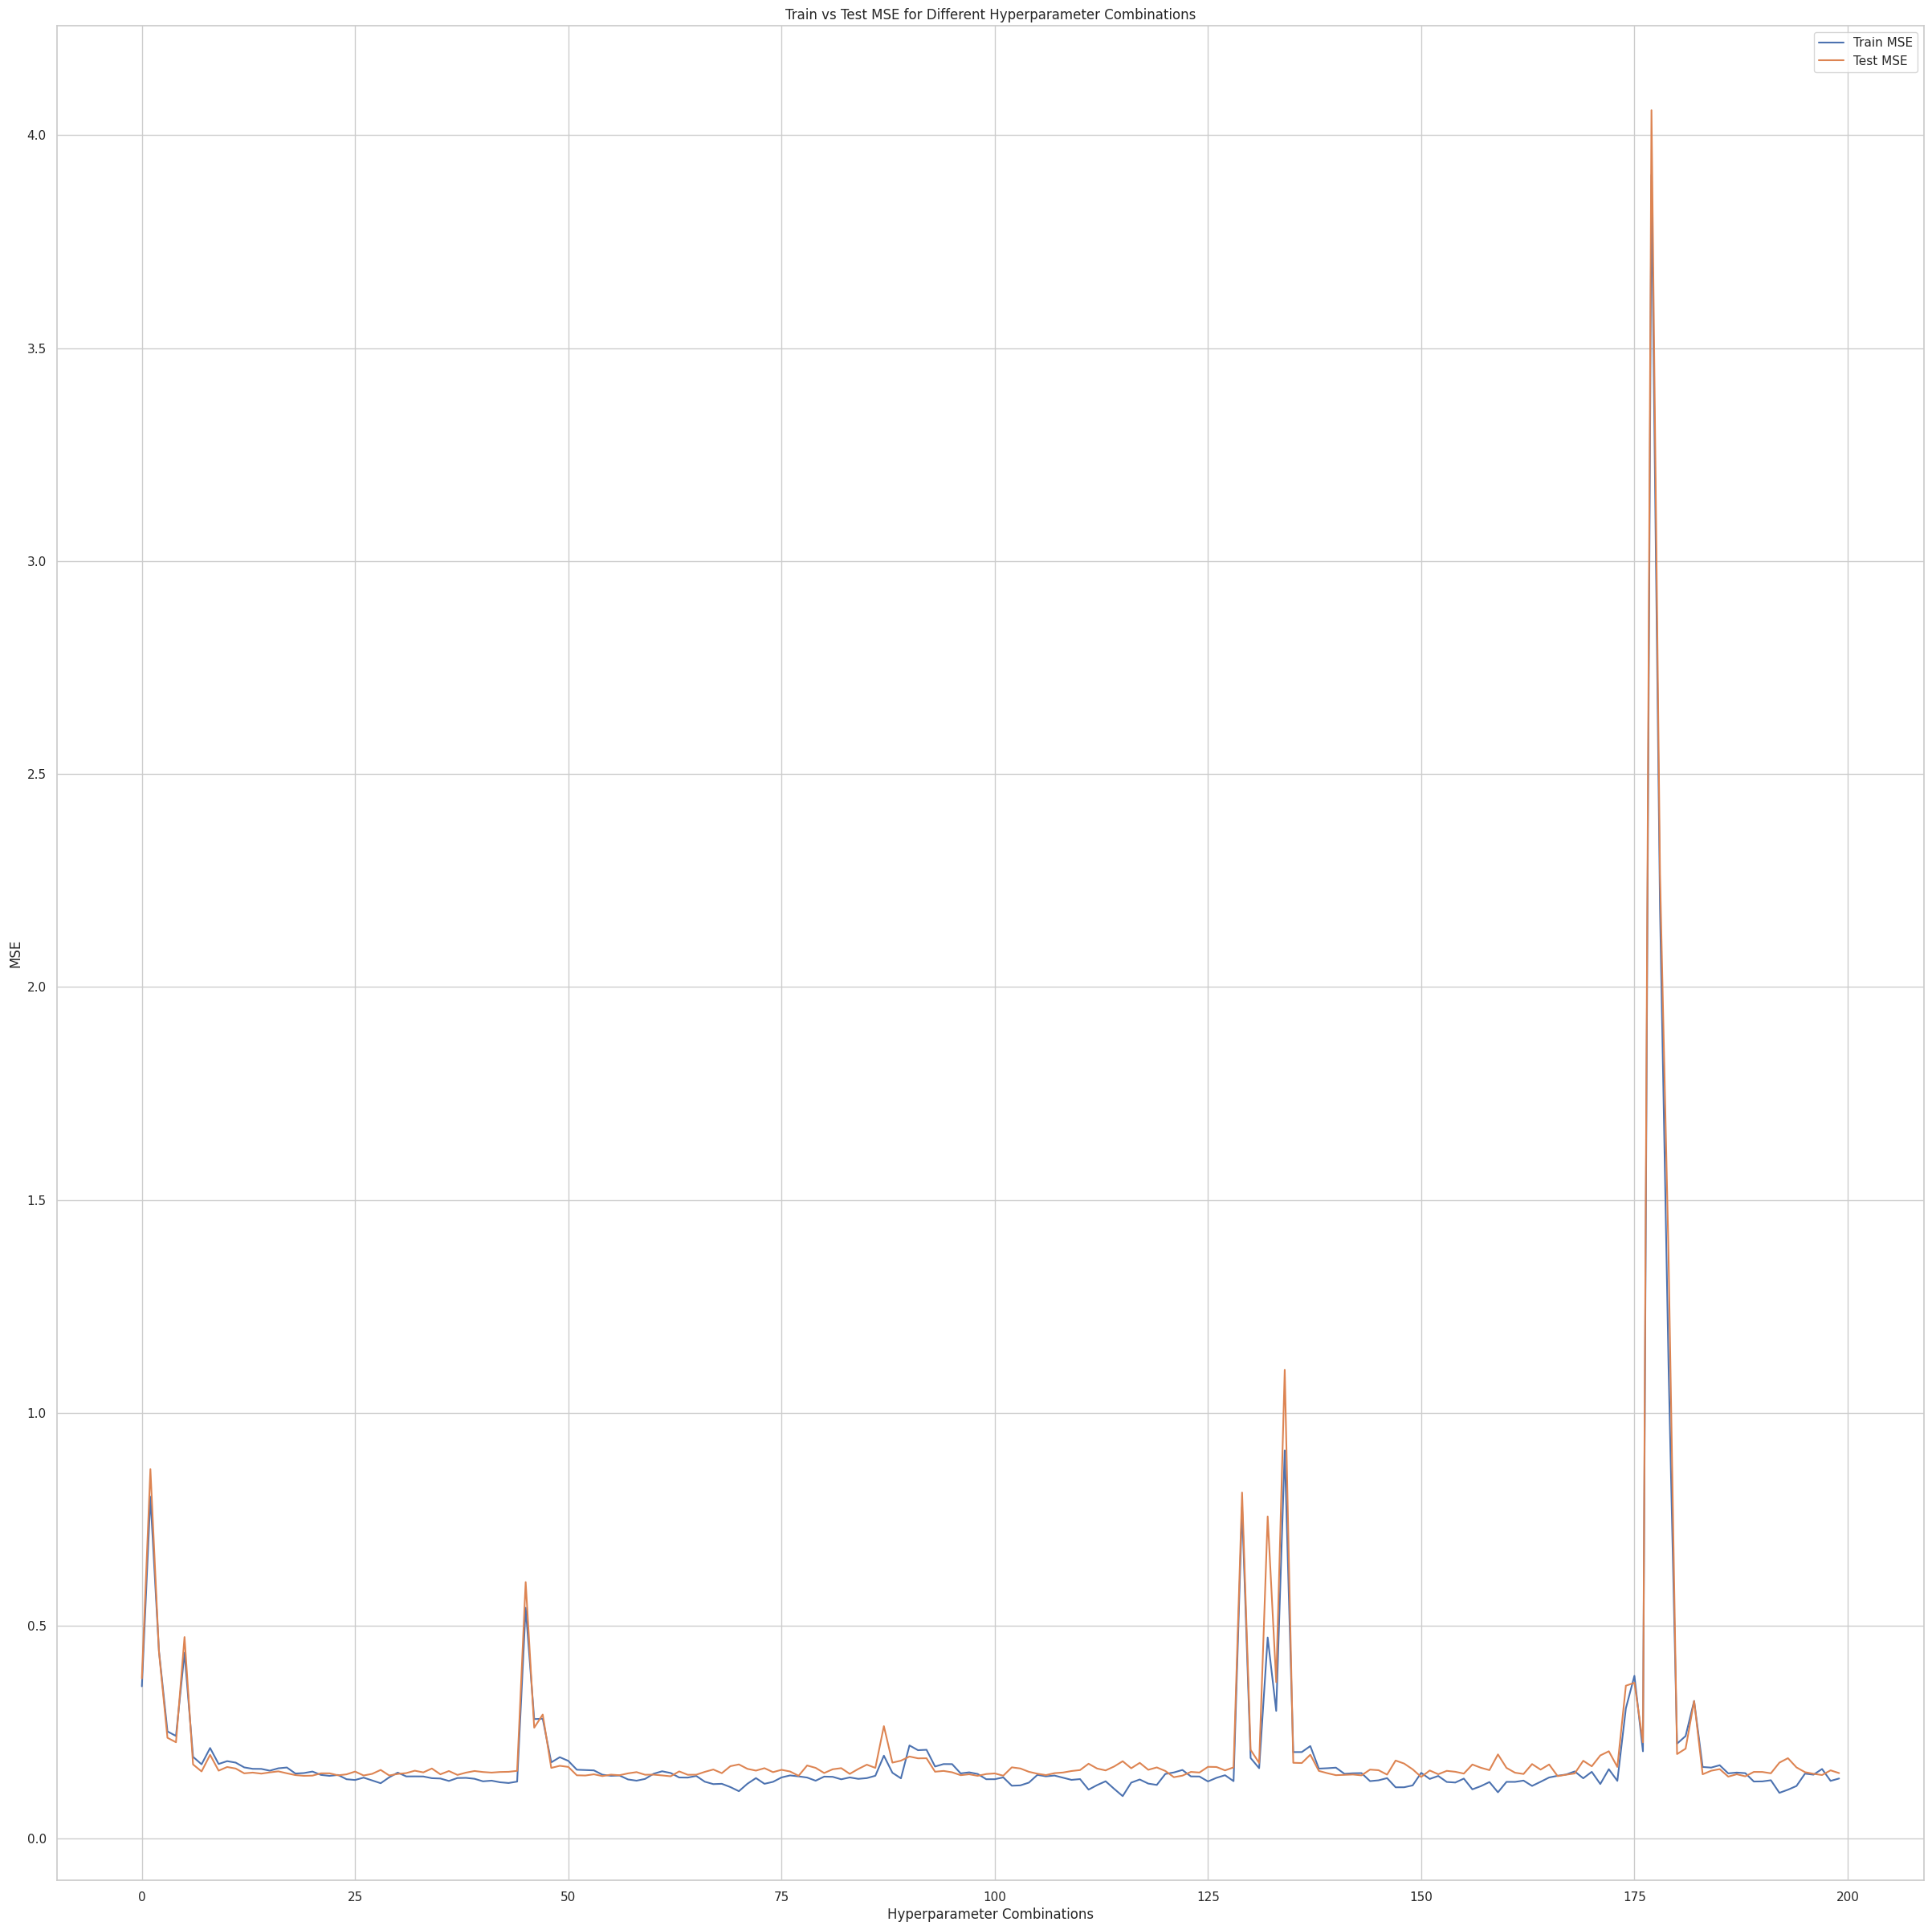

In [199]:
# Plot the results
plt.figure(figsize=(30, 30))
param_combinations = range(len(train_scores[:200]))

plt.plot(param_combinations, train_scores[:200], label='Train MSE')
plt.plot(param_combinations, test_scores[:200], label='Test MSE')
plt.title('Train vs Test MSE for Different Hyperparameter Combinations')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('MSE')
plt.legend()
plt.show()

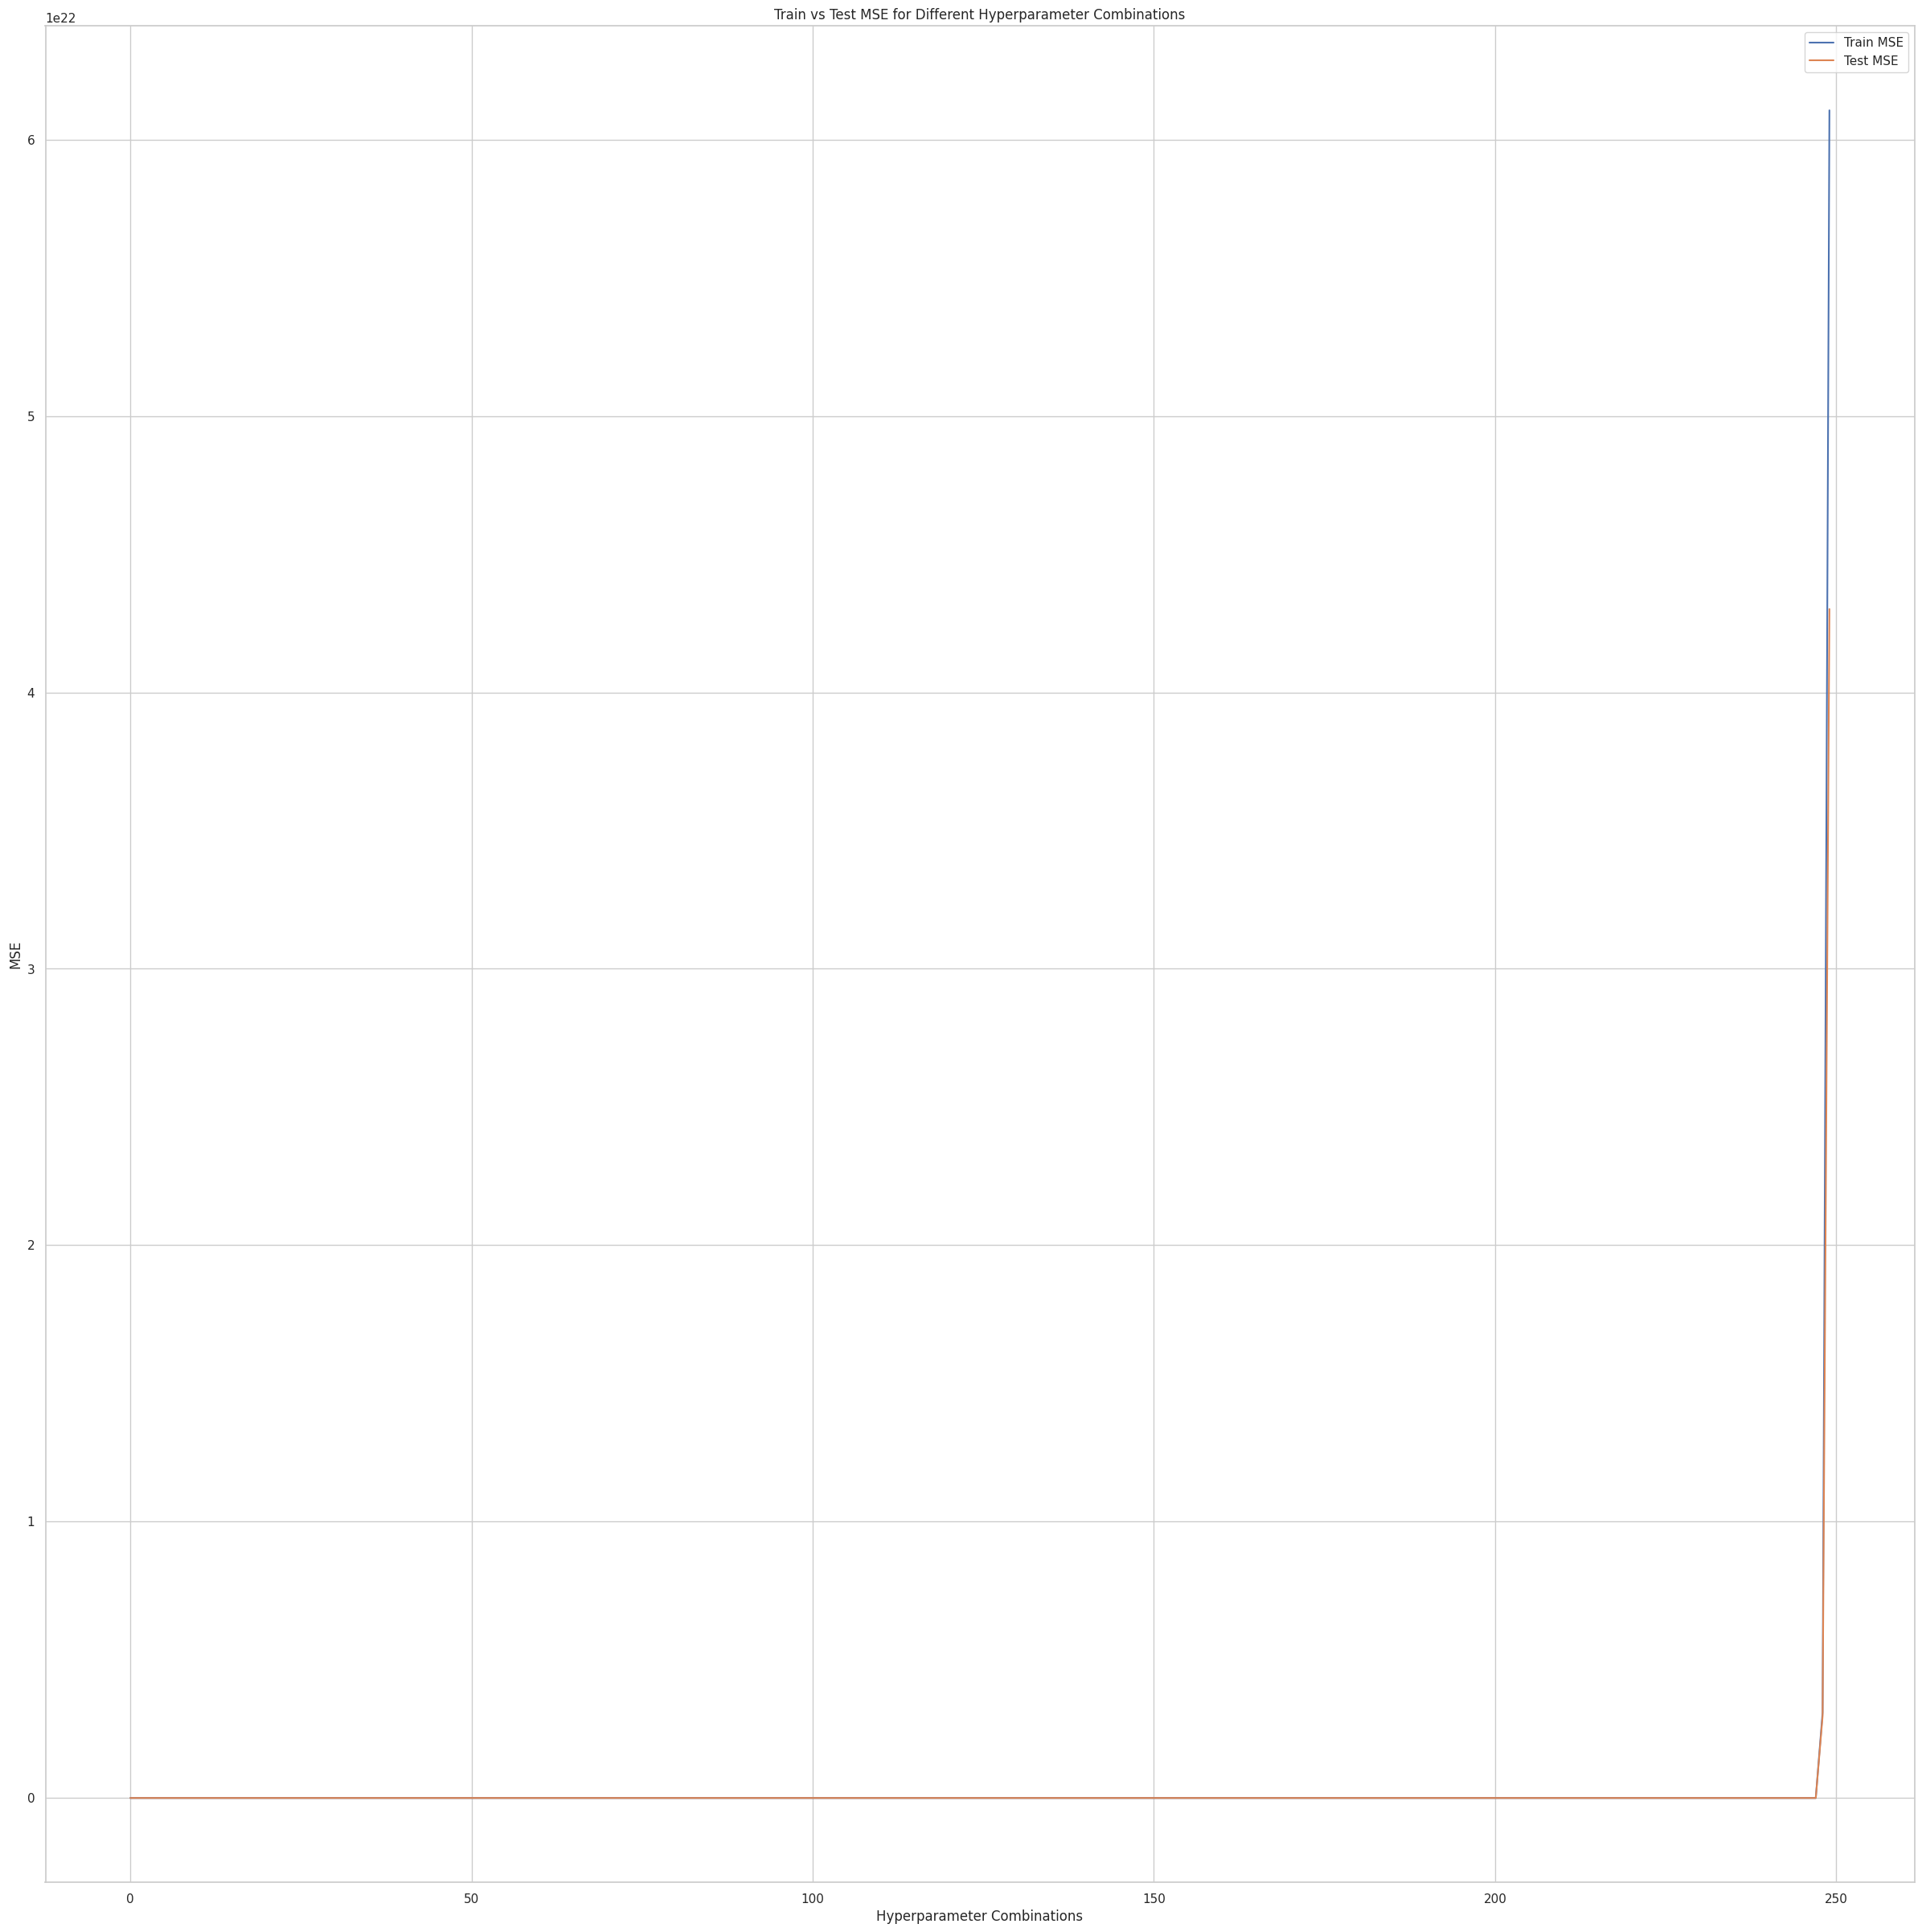

In [186]:
# Plot the results
plt.figure(figsize=(30, 30))
param_combinations = range(len(train_scores[200:]))

plt.plot(param_combinations, train_scores[200:], label='Train MSE')
plt.plot(param_combinations, test_scores[200:], label='Test MSE')
plt.title('Train vs Test MSE for Different Hyperparameter Combinations')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [187]:
# Custom MLPRegressor Class
#class MLPRegressor(BaseEstimator, RegressorMixin):
#    def __init__(self, input_size=8, hidden_layers=[64], 
#                 learning_rate=0.001, batch_size=32, num_epochs=100, weight_decay=1e-5):
#        self.input_size = input_size
#        self.hidden_layers = hidden_layers
#        self.learning_rate = learning_rate
#        self.batch_size = batch_size
#        self.num_epochs = num_epochs
#        self.weight_decay = weight_decay
#        
#        # Define the MLP model architecture dynamically based on hidden layers
#        layers = []
#        in_features = self.input_size
#        for hidden in self.hidden_layers:
#            layers.append(nn.Linear(in_features, hidden))
#            layers.append(nn.ReLU())
#            in_features = hidden
#        layers.append(nn.Linear(in_features, 1))  # Output layer for regression
#        self.model = nn.Sequential(*layers)
#        
#        # Initialize optimizer and loss function
#        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)
#        self.criterion = nn.MSELoss()
#
#    def fit(self, X, y):
#        self.model.train()
#        dataset = TensorDataset(X, y)
#        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
#        
#        for epoch in range(self.num_epochs):
#            running_loss = 0.0
#            for inputs, targets in dataloader:
#                self.optimizer.zero_grad()
#                outputs = self.model(inputs)
#                loss = self.criterion(outputs, targets)
#                loss.backward()
#                self.optimizer.step()
#                running_loss += loss.item()
#
#            if (epoch + 1) % 10 == 0:
#                print(f'Epoch {epoch + 1}/{self.num_epochs}, Loss: {running_loss / len(dataloader):.4f}')
#        return self
#
#    def predict(self, X):
#        self.model.eval()
#        with torch.no_grad():
#            predictions = self.model(X)
#        return predictions.numpy().flatten()
#
#    def score(self, X, y):
#        y_pred = self.predict(X)
#        mse = np.mean((y_pred - y.numpy()) ** 2)
#        return -mse  # Return negative MSE for scoring


In [188]:
#def test_hyperparameters(X, y, hidden_layers_options, learning_rates, batch_sizes, num_epochs_list, weight_decays):
#    results = []
#    kf = KFold(n_splits=5, shuffle=True, random_state=42)
#
#    for hidden_layers in hidden_layers_options:
#        for learning_rate in learning_rates:
#            for batch_size in batch_sizes:
#                for num_epochs in num_epochs_list:
#                    for weight_decay in weight_decays:
#                        print(f"Testing: Hidden Layers: {hidden_layers}, LR: {learning_rate}, Batch Size: {batch_size}, Epochs: {num_epochs}, Weight Decay: {weight_decay}")
#                        
#                        fold_mse = []
#                        for train_index, test_index in kf.split(X):
#                            X_train, X_test = X[train_index], X[test_index]
#                            y_train, y_test = y[train_index], y[test_index]
#                            
#                            model = MLPRegressor(input_size=X_train.shape[1], hidden_layers=hidden_layers,
#                                                 learning_rate=learning_rate, batch_size=batch_size,
#                                                 num_epochs=num_epochs, weight_decay=weight_decay)
#                            model.fit(X_train, y_train)
#                            fold_mse.append(-model.score(X_test, y_test))  # Store positive MSE
#
#                        avg_mse = np.mean(fold_mse)
#                        results.append((hidden_layers, learning_rate, batch_size, num_epochs, weight_decay, avg_mse))
#
#    return results

In [189]:
# Define hyperparameter options
#hidden_layers_options = [
#    [64],
#    [64, 32],
#    [64, 32, 16],
#    [128, 64],
#    [128, 64, 32],
#    [128, 64, 32, 16]
#]
#
#learning_rates = [0.01, 0.001, 0.0001]
#batch_sizes = [16, 32, 64]
#num_epochs_list = [50, 100, 150]
#weight_decays = [1e-5, 1e-4, 1e-3]

In [190]:
# Perform the tests
#results = test_hyperparameters(X_train_tensor, y_train_tensor, hidden_layers_options, learning_rates, batch_sizes, num_epochs_list, weight_decays)


In [191]:
# Extract results for plotting
#hidden_layers_str = [' | '.join(map(str, hl)) for hl, _, _, _, _, _ in results]
#mse_scores = [mse for _, _, _, _, _, mse in results]


In [192]:
# Plotting the results
#plt.figure(figsize=(12, 6))
#plt.barh(hidden_layers_str, mse_scores, color='skyblue')
#plt.xlabel('Mean Squared Error (MSE)')
#plt.title('Model Performance by Hyperparameter Configurations')
#plt.grid(axis='x')
#plt.tight_layout()
#plt.show()
#
## Select the best model based on the lowest MSE
#best_model_config = min(results, key=lambda x: x[-1])
#print("Best Model Configuration:")
#print(f"Hidden Layers: {best_model_config[0]}, Learning Rate: {best_model_config[1]}, "
#      f"Batch Size: {best_model_config[2]}, Epochs: {best_model_config[3]}, "
#      f"Weight Decay: {best_model_config[4]}, MSE: {best_model_config[5]}")

In [193]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import KFold
## Initialize the custom MLPRegressor
#mlp_regressor = MLPRegressor(input_size=X_train.shape[1])
#
## Define the parameter grid for RandomizedSearchCV
#param_grid = {
#    'hidden_layer_1': [32, 64, 128],
#    'hidden_layer_2': [16, 32, 64],
#    'hidden_layer_3': [8, 16, 32],
#    'learning_rate': [0.01, 0.001, 0.0001],
#    'batch_size': [16, 32, 64],
#    'num_epochs': [50, 100, 150],
#    'weight_decay': [1e-5, 1e-4, 1e-3]
#}
#
#kf = KFold(n_splits=10, shuffle=True, random_state=1)
## Initialize RandomizedSearchCV
#random_search = RandomizedSearchCV(estimator=mlp_regressor, param_distributions=param_grid, 
#                                   n_iter=10, scoring='neg_mean_squared_error', cv=kf, random_state=42, n_jobs=-1)
#
## Perform the randomized search
#random_search.fit(X_train, y_train)
#
## Best hyperparameters
#print("Best Hyperparameters:", random_search.best_params_)

In [194]:
#best_model = random_search.best_estimator_
#best_model.score(X_test,y_test)

In [195]:
## Initialize the model
#input_size = X_train.shape[1]
#model = MLP(input_size)
#
## Define the loss function and optimizer
#criterion = nn.MSELoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
#
## Create DataLoader for batching
#train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
#train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
#
## Train the model
#num_epochs = 100
#for epoch in range(num_epochs):
#    model.train()
#    running_loss = 0.0
#    for inputs, targets in train_loader:
#        optimizer.zero_grad()
#        outputs = model(inputs)
#        loss = criterion(outputs, targets)
#        loss.backward()
#        optimizer.step()
#        running_loss += loss.item()
#    
#    if (epoch+1) % 10 == 0:
#        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}')


In [196]:
# Model evaluation on test set
#model.eval()
#with torch.no_grad():
#    predictions = model(torch.tensor(X_test, dtype=torch.float32))
#    mse = criterion(predictions, torch.tensor(y_test, dtype=torch.float32).unsqueeze(1))
#    print(f'Test MSE: {mse.item()}')
